*Импортируем модули*

In [1]:
import numpy as np
import pandas as pd
from utils.plot import plot_bars

*Загружаем данные*

In [2]:
df = pd.read_csv('data/flavors_of_cacao.csv', delimiter=',')

*Выведем выборку для наглядности*

In [3]:
df.head()

,Company (Maker-if known),Specific Bean Originor Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


*Оценим целостность данных (количество NaN по столбцам)*

In [4]:
df.isnull().sum()

Company (Maker-if known)           0
Specific Bean Originor Bar Name    0
REF                                0
Review Date                        0
Cocoa Percent                      0
Company Location                   0
Rating                             0
Bean Type                          1
Broad Bean Origin                  1
dtype: int64

In [5]:
xlabel = 'Страны'
ylabel = 'Вероятности'

**Задание 1.** Посчитать априорные вероятности для каждой страны происхождения (Company Locaction) получения оценки выше 3.7

*__Этап 1.__ Выведем список стран, городов и провинций происхождения (Company Location)*

In [6]:
print(df['Company Location'].unique())

['France' 'U.S.A.' 'Fiji' 'Ecuador' 'Mexico' 'Switzerland' 'Netherlands'
 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'U.K.' 'Australia' 'Wales'
 'Belgium' 'Germany' 'Russia' 'Puerto Rico' 'Venezuela' 'Colombia' 'Japan'
 'New Zealand' 'Costa Rica' 'South Korea' 'Amsterdam' 'Scotland'
 'Martinique' 'Sao Tome' 'Argentina' 'Guatemala' 'South Africa' 'Bolivia'
 'St. Lucia' 'Portugal' 'Singapore' 'Denmark' 'Vietnam' 'Grenada' 'Israel'
 'India' 'Czech Republic' 'Domincan Republic' 'Finland' 'Madagascar'
 'Philippines' 'Sweden' 'Poland' 'Austria' 'Honduras' 'Nicaragua'
 'Lithuania' 'Niacragua' 'Chile' 'Ghana' 'Iceland' 'Eucador' 'Hungary'
 'Suriname' 'Ireland']


*__Этап 2.__ Посчитаем априорные вероятности по формуле частотной вероятности P(A)=n/N, где N – количество наблюдений (total), а n – количество наступлений события A*

In [7]:
def grouped_probability(col, n_flt, grp, **kwargs):
  n = df[n_flt].groupby(grp).count()[col]

  if type(kwargs.get('t_flt')) is pd.Series:
    total = df[kwargs['t_flt']].groupby(grp).count()[col]
  else:
    total = df.groupby(grp).count()[col]

  return (n / total).dropna()


def simple_probability(col, n_flt, **kwargs):
  n = df[n_flt].count()[col]
  
  if type(kwargs.get('t_flt')) is pd.Series:
    total = df[kwargs['t_flt']].count()[col]
  else:
    total = df.count()[col]

  return n / total


def probability(col, n_flt, **kwargs):
  if (kwargs.get('grp')):
    return grouped_probability(col, n_flt, kwargs.pop('grp'), **kwargs)
  else:
    return simple_probability(col, n_flt, **kwargs)

*Рассчитаем априорные вероятности получения оценки выше 3.7 для всех стран*

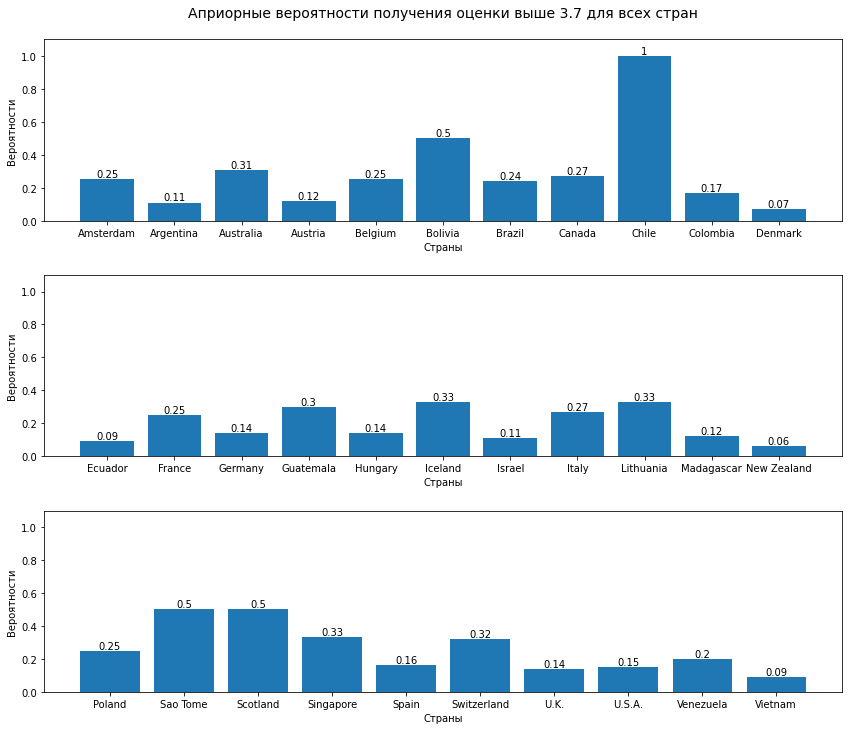

In [8]:
n_flt = df['Rating'] > 3.7
pa = probability('Rating', n_flt, grp='Company Location')

title = 'Априорные вероятности получения оценки выше 3.7 для всех стран'
plot_bars(np.array_split(pa, 3), title, xlabel, ylabel)

**Задание 2.** Используя их, посчитать вероятность того, что новый сорт какао с содержанием выше 73% (Cocoa Percent) будет иметь оценку выше 3.7 для стран:
<br>
a. Европы плюс Африки
<br>
b. Серверного полушария
<br>
c. Обеих Америк
<br>
d. Южного полушария

*__Этап 1.__ Составим списки стран, провинций и городов в соответствии с частями задания*

In [9]:
europe_and_africa = ['Amsterdam', 'Austria', 'Belgium', 'Denmark', 'France', 'Germany', 'Hungary', 'Iceland', 'Italy', 'Lithuania', 'Madagascar', 'Poland', 'Sao Tome', 'Scotland', 'Spain', 'Switzerland', 'U.K.']
northern_hemisphere = ['Amsterdam', 'Brazil', 'Austria', 'Colombia', 'Ecuador', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany', 'Sao Tome', 'Guatemala', 'Hungary', 'Vietnam', 'Singapore', 'Iceland', 'Israel', 'Italy', 'Lithuania', 'Poland', 'Scotland', 'Spain', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela']
america = ['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Ecuador', 'Guatemala', 'U.S.A.', 'Venezuela']
southern_hemisphere = ['Australia', 'Bolivia', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Madagascar', 'New Zealand', 'Sao Tome']

<i><b>Этап 2.</b> Посчитаем вероятности по формуле Байеса P(A|B) = P(B|A) * P(A)/P(B), где
<br>
P(A|B) – вероятность наступления события А при условии, что событие В уже случилось
<br>
P(B|A) – вероятность наступления события В при условии, что событие А уже случилось
<br>
P(A) – априорная вероятность наступления события А
<br>
P(B) – априорная вероятность наступления события В</i>

In [10]:
def grouped_bayes(a, b, a_flt, b_flt, grp):
  pa = probability(a, a_flt, grp=grp)
  pb = probability(b, b_flt, grp=grp)
  pba = probability(a, a_flt & b_flt, t_flt=a_flt, grp=grp)
  pab = pba * pa / pb
  
  return pab.dropna()


def simple_bayes(a, b, a_flt, b_flt):
  pa = probability(a, a_flt)
  pb = probability(b, b_flt)
  pba = probability(a, a_flt & b_flt, t_flt=a_flt)
  pab = pba * pa / pb
  
  return pab


def bayes(a, b, a_flt, b_flt, **kwargs):
  if kwargs.get('grp'):
    return grouped_bayes(a, b, a_flt, b_flt, kwargs['grp'])
  else:
    return simple_bayes(a, b, a_flt, b_flt)

*Рассчитаем вероятности, что новый сорт какао с содержанием более 73% какао-бобов\nбудет иметь оценку выше 3.7 баллов, для всех стран*

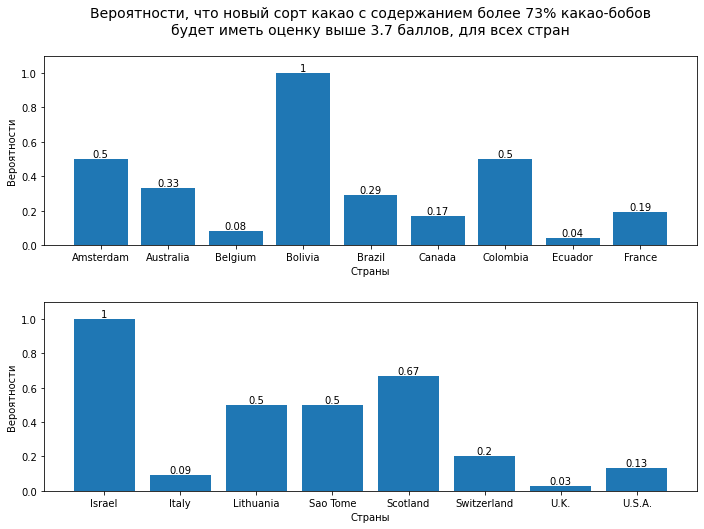

In [11]:
a_flt = df['Rating'] > 3.7
b_flt = df['Cocoa Percent'].str[:-1].astype(float) > 73
pab = bayes('Rating', 'Cocoa Percent', a_flt, b_flt, grp='Company Location')

title = 'Вероятности, что новый сорт какао с содержанием более 73% какао-бобов\nбудет иметь оценку выше 3.7 баллов, для всех стран'
plot_bars(np.array_split(pab, 2), title, xlabel, ylabel)

*a. Европа и Африка*

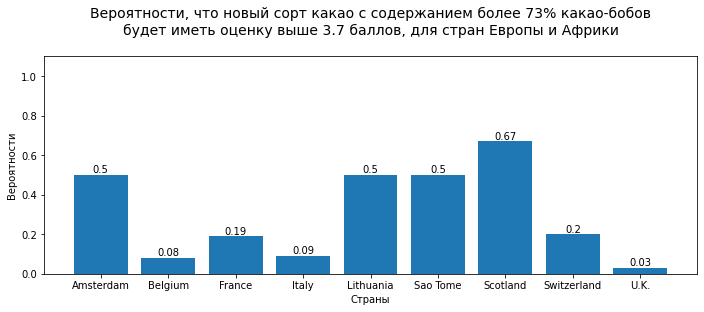

In [12]:
ixs = pab.index.intersection(europe_and_africa)

title = 'Вероятности, что новый сорт какао с содержанием более 73% какао-бобов\nбудет иметь оценку выше 3.7 баллов, для стран Европы и Африки'
plot_bars(pab.loc[ixs], title, xlabel, ylabel)

*b. Северное полушарие*

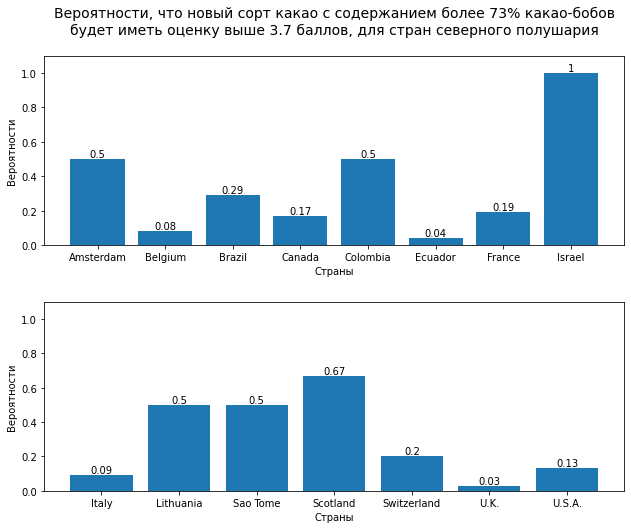

In [13]:
ixs = pab.index.intersection(northern_hemisphere)

title = 'Вероятности, что новый сорт какао с содержанием более 73% какао-бобов\nбудет иметь оценку выше 3.7 баллов, для стран северного полушария'
plot_bars(np.array_split(pab.loc[ixs], 2), title, xlabel, ylabel)

*c. Северная и Южная Америка*

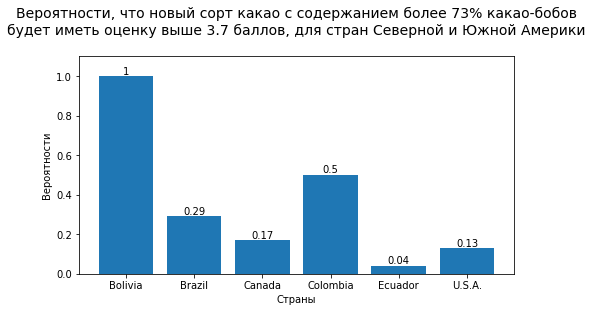

In [14]:
ixs = pab.index.intersection(america)

title = 'Вероятности, что новый сорт какао с содержанием более 73% какао-бобов\nбудет иметь оценку выше 3.7 баллов, для стран Северной и Южной Америки'
plot_bars(pab.loc[ixs], title, xlabel, ylabel)

*d. Южное полушарие*

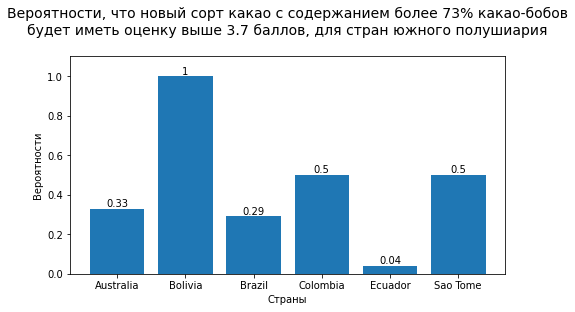

In [15]:
ixs = pab.index.intersection(southern_hemisphere)

title = 'Вероятности, что новый сорт какао с содержанием более 73% какао-бобов\nбудет иметь оценку выше 3.7 баллов, для стран южного полушиария'
plot_bars(pab.loc[ixs], title, xlabel, ylabel)

**Задание 3.** Сделать прогноз, какова вероятность того, что обзоры какао после 2014 года будут иметь оценку выше медианной по всему периоду после 2010 года

*__Этап 1.__ Рассчитаем медианную оценку для обзоров какао периода после 2010 года*

In [16]:
median = df[df['Review Date'] > 2010]['Rating'].median()

print(f'Медианная оценка для обзоров какао периода после 2010 года составляет {round(median, 2)} баллов')

Медианная оценка для обзоров какао периода после 2010 года составляет 3.25 баллов


*__Этап 2.__ Сделаем прогноз, рассчитав вероятности по формуле Байеса*

In [17]:
a_flt = df['Rating'] > median
b_flt = df['Review Date'] > 2014
pab = bayes('Rating', 'Review Date', a_flt, b_flt)

print(f'Вероятность, что обзоры какао после 2014 года будут иметь оценку выше медианной по периоду после 2010 года, составляет {round(pab, 2)}')

Вероятность, что обзоры какао после 2014 года будут иметь оценку выше медианной по периоду после 2010 года, составляет 0.43
